<a href="https://colab.research.google.com/github/Preethesh26/Image-Classification-cat-vs-dog-/blob/main/Image_Classification_(Cats_vs_Dogs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy matplotlib

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

train_dir = "/content/drive/My Drive/Colab Notebooks/Train"
test_dir = "/content/drive/My Drive/Colab Notebooks/Test"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 7508 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 1042s 4s/step - accuracy: 0.6115 - loss: 0.6917 - val_accuracy: 0.5212 - val_loss: 0.6784
Epoch 2/15
  1/234 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5312 - loss: 0.6880

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


234/234 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.5312 - loss: 0.6880 - val_accuracy: 0.5287 - val_loss: 0.6596
Epoch 3/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 81s 348ms/step - accuracy: 0.6634 - loss: 0.6015 - val_accuracy: 0.5746 - val_loss: 0.6332
Epoch 4/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7500 - loss: 0.5331 - val_accuracy: 0.5685 - val_loss: 0.6438
Epoch 5/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.6644 - loss: 0.6001 - val_accuracy: 0.6341 - val_loss: 0.6223
Epoch 6/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6250 - loss: 0.6650 - val_accuracy: 0.6406 - val_loss: 0.6177
Epoch 7/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 141s 383ms/step - accuracy: 0.6910 - loss: 0.5699 - val_accuracy: 0.7228 - val_loss: 0.5445
Epoch 8/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8125 - loss: 0.4894 - val_accuracy: 0.7182 - val_loss: 0.5543
Epoch 9/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 142s 417ms/step - accuracy: 0.7198 - loss: 0.5461 - val_acc

In [ ]:
model.save('cats_vs_dogs_model1.keras')


In [ ]:
print("Training data:")
for data_batch, labels_batch in train_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break


print("\nTesting data:")
for data_batch, labels_batch in test_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break

Training data:
Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32,)

Testing data:
Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32,)


In [ ]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.7860 - loss: 0.4539
Test Accuracy: 78.40%


Current working directory: /content
Model path: /content/cats_vs_dogs_model1.keras


Saving download.jpeg to download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


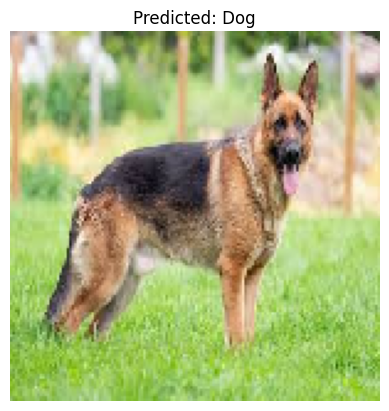

In [ ]:
# @title Default title text
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

current_directory = os.getcwd()
print("Current working directory:", current_directory)

model_path = os.path.join(current_directory, 'cats_vs_dogs_model1.keras')
print("Model path:", model_path)

model = load_model(model_path)


def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

from google.colab import files
uploaded = files.upload()

image_filename = list(uploaded.keys())[0]
image_path = os.path.join(current_directory, image_filename)
preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)

predicted_label = 'Dog' if prediction[0] > 0.5 else 'Cat'

img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
